Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data
delivery=pd.read_csv('delivery_time.csv')

In [4]:
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
delivery.columns=['Delivery_Time', 'Sorting_Time']

In [6]:
delivery.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
delivery.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

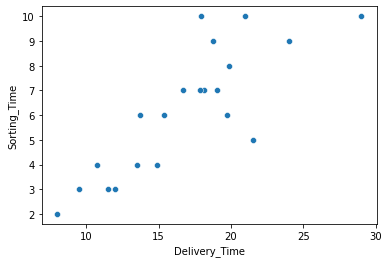

In [9]:
sns.scatterplot(x=delivery['Delivery_Time'], y=delivery['Sorting_Time'])

In [10]:
delivery.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

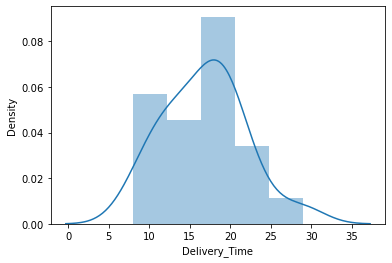

In [11]:
sns.distplot(delivery['Delivery_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

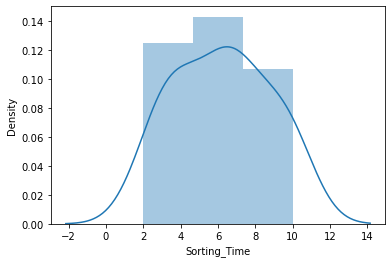

In [12]:
sns.distplot(delivery['Sorting_Time'])

In [33]:
#Build Model
model=smf.ols("Sorting_Time~Delivery_Time",data=delivery).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 29 May 2021   Prob (F-statistic):           3.98e-06
Time:                        07:37:53   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
Delivery_Time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

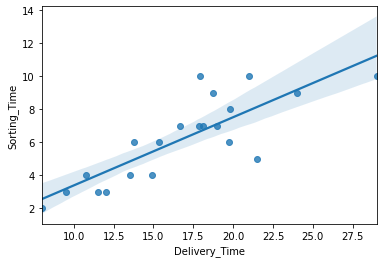

In [36]:
#Regression plot
sns.regplot(x=delivery['Delivery_Time'], y=delivery['Sorting_Time'])

In [37]:
model.params

Intercept       -0.756673
Delivery_Time    0.413744
dtype: float64

In [38]:
print(model.tvalues)

Intercept       -0.667290
Delivery_Time    6.387447
dtype: float64


In [39]:
print(model.pvalues)

Intercept        0.512611
Delivery_Time    0.000004
dtype: float64


In [40]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [41]:
#Prediction of new data
new_data=pd.Series([11,8])


In [43]:
data_pred=pd.DataFrame(new_data,columns=['Delivery_Time'])

In [44]:
data_pred

,Delivery_Time
0,11
1,8


In [45]:
model.predict(data_pred)

0    3.794507
1    2.553276
dtype: float64